# Exploratory data analysis

___________________________________________________________________________________

**Filename of cleaned data**
- combined_data.json

___________________________________________________________________________________________

## 1.0 Loading the files

In [18]:
#Import necessary libraries
import json 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
with open('../data/processed_data/combined_data.json', 'r') as file:
    data= json.load(file)
df=pd.DataFrame.from_dict(data)

In [20]:
#For now, I will exclude the ingredients
df1=df.drop(columns=['ingredients', 'highlighted_ingr'])

KeyError: "['ingredients'] not found in axis"

## 2.0 Investigating data profiles

### Getting to know the individal data - initial observations & findings
1) num_likes: wide spread in the number of likes; few with 0 likes need to be investigated further; distribution to check
- products with 0 likes not unusual so no action taken 
- may have to be normalised later in the process 

2) rating: 

- c. 80% have a rating of 4-4.5. While majority are in 4-4.5 so assuming most predictions will fall in this category, it will be important to set a good baseline to measure model accuracy 

3) num_reviews: same observation as num_likes

- several outliers as some products have >1000 reviews whereas most have <500
- outliers come from very popular brands and typically have high number of likes so it is unlikely to be an error

4) various skin types
- results not surprising; only a small percentage catering to sensitive skin

6) skin_concerns
- very few products targetting each skin concern

7) acids: same as skinconcerns

8) brands
     
- brands with the most products: Clinique, Kiehls, The Ordinary, Shiseido
    
9) awards 

- Only 9% of the products have been awarded, indicating a selective handpicking of top products 
    
10) clinical results 
- fair % publishing clinical results (39%) possibly to provide more credibility to the product or brand

11) formulation type 
- most are creams and serums

12) richness 
- most products have a normal or light richness

___________________________________________________________

### Overview

In [21]:
#Summarize descriptive statistics
df1.describe(include='all').T

NameError: name 'df1' is not defined

In [ ]:
#Investigating numeric features 
numeric = df1.select_dtypes(include=['float64', 'int64']).copy()
numeric.hist(bins=30, figsize=(20,20))
plt.show()

### Exploring individual features

##### 1) Number of likes

In [ ]:
#There's only a few entries 0 likes. This does not seem unusual so no action taken.
df1[df1.num_likes==0]

In [ ]:
#Majority of products have <6k likes although there are outliers
df.num_likes[df.num_likes<=10000].hist(bins=50)
plt.show()

In [ ]:
#Skewed data is confirmed
sns.boxplot(y='num_likes', data=df)
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 56.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


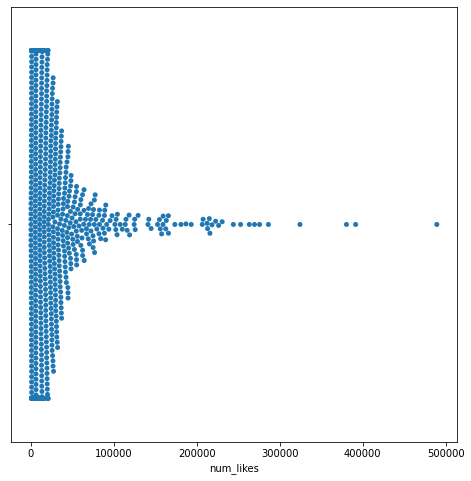

In [4]:
plt.figure(figsize=(8,8))
sns.swarmplot(x='num_likes', data=df)
plt.show()

##### 2) Ratings

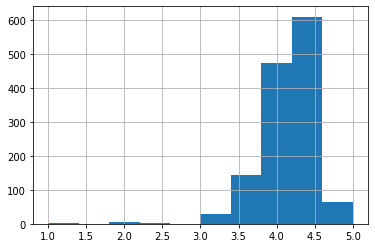

In [5]:
#Majority of ratings fall between 4-4.5
df.rating.hist()
plt.show()

In [6]:
#To be specific, about 80% lie on either a 4 or 4.5 rating
df.rating.value_counts(normalize=True)

4.5    0.456652
4.0    0.355007
3.5    0.108371
5.0    0.048580
3.0    0.022422
2.0    0.004484
2.5    0.002242
1.0    0.002242
Name: rating, dtype: float64

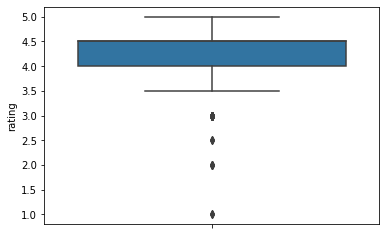

In [7]:
#There are very few with less than 3.5 rating
sns.boxplot(y='rating', data=df)
plt.show()

In [8]:
#A lot of the poorly rated products also have a small number of reviews, which may indicate their unpopularity
df.loc[df.rating<3.5,['brand', 'product_name', 'product_type', 'num_likes', 'rating', 'num_reviews', 'clinical_results', 'formulation_type', 'richness']]

,brand,product_name,product_type,num_likes,rating,num_reviews,clinical_results,formulation_type,richness
19,Clarins,Clarins Velvet Cleansing Milk,face wash and cleansers,445,1.0,1,1,cream,normal
20,Clarins,Clarins Soothing Toning Lotion,toners,388,3.0,2,1,liquid,normal
48,CLINIQUE,CLINIQUE Blackhead Solutions Self-heating Blac...,face wash and cleansers,29000,3.0,176,1,others,normal
87,LANEIGE,LANEIGE Moisturizing Cream Cleanser,face wash and cleansers,4200,3.0,117,0,cream,normal
241,Jack Black,Jack Black Oil-Control Toner,toners,399,2.0,4,1,others,normal
324,FOREO,FOREO Serum Serum Serum,"essences, serums and treatments",720,2.0,3,0,serum,light
329,Mario Badescu,Mario Badescu Hyaluronic Dew Drops Hydrating S...,"essences, serums and treatments",1400,3.0,5,0,serum,light
340,BeautyBio,BeautyBio The Daily Vitamin C Day Serum with A...,"essences, serums and treatments",2000,3.0,8,1,serum,normal
341,SK-II,SK-II Ultimate Revival Serum,"essences, serums and treatments",690,1.0,1,0,others,normal
350,tarte,tarte Youth or Dare Multi-Acid & C-Serum,"essences, serums and treatments",12700,3.0,131,1,serum,normal


##### 3) Number of reviews

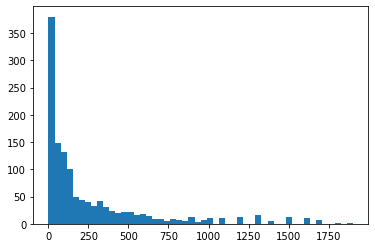

In [9]:
#Another skewed feature
plt.hist(df.num_reviews[df.num_reviews<2000], bins=50)
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 61.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


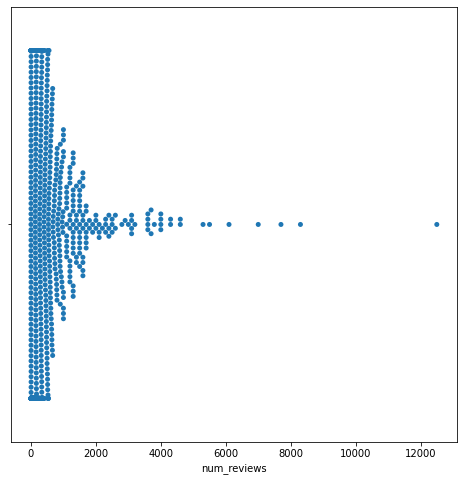

In [10]:
plt.figure(figsize=(8,8))
sns.swarmplot(x='num_reviews', data=df)
plt.show()

In [11]:
#Checking the products which have very high number of reviews 
df[df.num_reviews>=4000]

,brand,product_name,product_type,num_likes,rating,num_reviews,sensitive_type,combination_type,oily_type,normal_type,...,Hydrating,Loss of firmness,Pores,Redness,num_excl_ingr,AHA/Glycolic Acid,Hyaluronic Acid,Salicylic Acid,Vitamin C,ingr_list
198,CLINIQUE,CLINIQUE Take The Day Off Cleansing Balm,face wash and cleansers,152600,4.5,4000,1,1,1,1,...,0,0,0,0,2,0,0,0,0,"Ethylhexyl Palmitate, Carthamus Tinctorius (Sa..."
203,philosophy,philosophy Purity Made Simple Cleanser,face wash and cleansers,193300,4.5,12500,0,1,1,1,...,0,0,1,0,2,0,0,0,0,"Aqua/Water/Eau, Sodium Lauroamphoacetate, Sodi..."
210,First Aid Beauty,First Aid Beauty Pure Skin Face Cleanser,face wash and cleansers,116000,4.5,4300,0,1,0,1,...,0,0,0,1,1,0,0,0,0,"Water/Aqua/Eau, Sodium Cocoyl Isethionate, Gly..."
216,Farmacy,Farmacy Green Clean Makeup Removing Cleansing ...,face wash and cleansers,286400,4.5,4600,0,1,1,1,...,0,0,0,0,1,0,0,0,0,"Cetyl Ethylhexanoate, Caprylic/Capric Triglyce..."
217,fresh,fresh Soy Makeup Removing Face Wash,face wash and cleansers,222700,4.5,8300,0,1,1,1,...,0,0,0,0,0,0,0,0,0,"Water, Coco-Glucoside, Glycerin, Butylene Glyc..."
459,OLEHENRIKSEN,OLEHENRIKSEN Truth Serum®,"essences, serums and treatments",215100,4.0,5300,1,1,1,1,...,0,0,0,0,1,0,0,0,1,"Aqua/Water/Eau, Glycerin, Oleth-20, Sodium Asc..."
547,GLAMGLOW,GLAMGLOW SUPERMUD® Charcoal Instant Treatment ...,"essences, serums and treatments",269600,4.0,6100,0,1,1,1,...,0,0,1,0,0,0,0,1,0,"Water, Kaolin, Magnesium Aluminum Silicate, Ma..."
565,SUNDAY RILEY,SUNDAY RILEY Good Genes All-In-One Lactic Acid...,"essences, serums and treatments",207600,4.5,4600,1,1,1,1,...,0,0,1,0,0,0,0,0,0,"Botanical Blend [Aqua, Opuntia Tuna Fruit Extr..."
571,The Ordinary,The Ordinary Niacinamide 10% + Zinc 1%,"essences, serums and treatments",489500,4.0,4000,1,1,1,1,...,0,0,0,0,1,0,0,0,0,"Water, Niacinamide, Pentylene Glycol, Zinc PCA..."
815,Josie Maran,Josie Maran 100 percent Pure Argan Oil,"essences, serums and treatments",129199,4.5,7700,0,1,1,1,...,0,0,0,0,0,0,0,0,0,"Argania Spinosa (Argan) Kernel Oil. , Pure Arg..."


#### 8). Brands

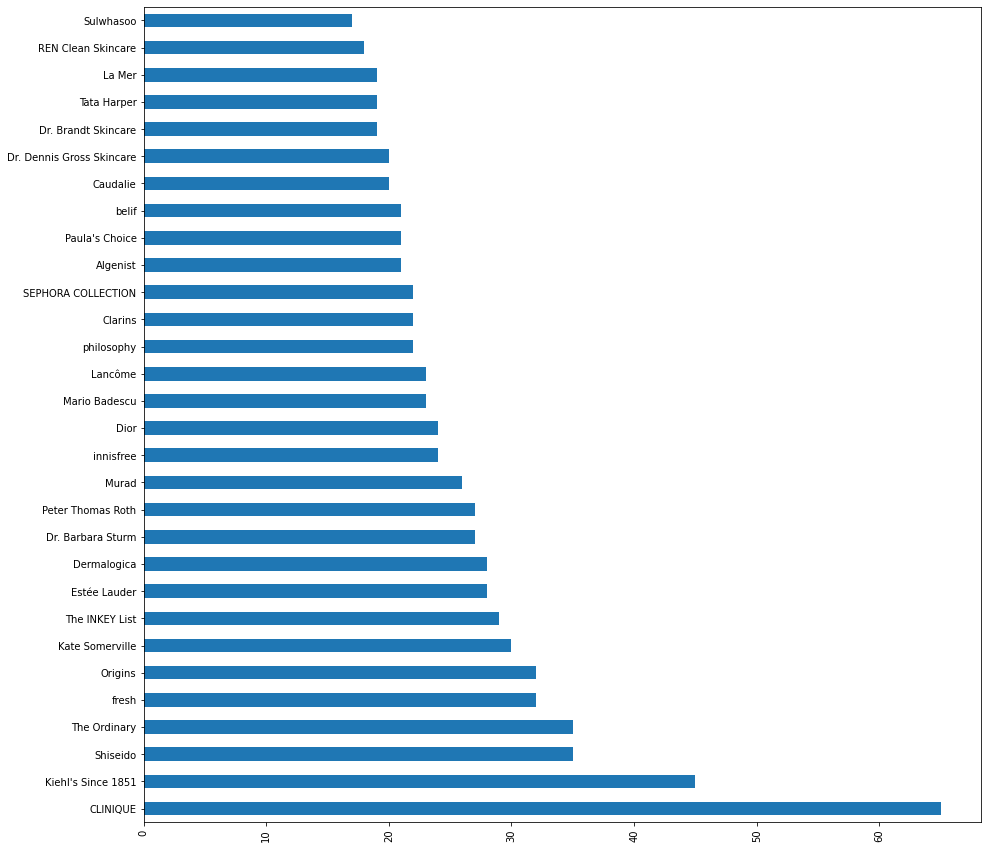

In [12]:
#Brands with the most products - Clinique, The Ordinary, Kiehls, Shiseido
topbrands= df['brand'].value_counts()[:30]
plt.figure(figsize=(15,15))
topbrands.plot(kind='barh')
plt.xticks(rotation=90)
plt.show()

***10) Formula type***

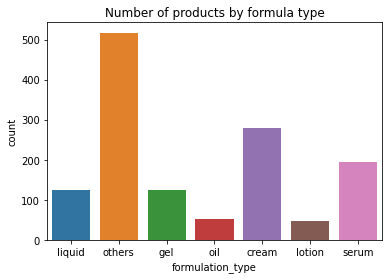

In [13]:
sns.countplot(x='formulation_type', data=df)
plt.title('Number of products by formula type')
plt.show()

***11) Richness***

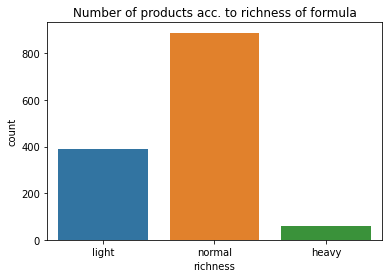

In [14]:
#Few products with a heavy composition; usually normal or light
sns.countplot(x='richness', data=df)
plt.title('Number of products acc. to richness of formula')
plt.show()

## 2.0 Data relationships

### Overview

In [15]:
#Checking correlation between variables to discover patterns 
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr(), square=True, cbar_kws={'fraction':0.01}, cmap='PuBuGn', linewidth=1)
plt.show()

NameError: name 'df1' is not defined

<Figure size 720x720 with 0 Axes>

In [ ]:
#Pairplot1
plt.figure(figsize=(20,50))
sns.set_style('dark')
sns.pairplot(data=df1, x_vars=['rating', 'pricepervol'], 
             y_vars=['product_type', 'num_likes', 'rating',
       'num_reviews', 'sensitive_type', 'combination_type', 'oily_type',
       'normal_type', 'dry_type', 'clean_sephora', 'cruelty_free', 'vegan',
       'best_for_skintype', 'award', 'pricepervol', 'clinical_results',
       'formulation_type', 'richness'])
plt.show()

In [ ]:
#Pairplot 2
plt.figure(figsize=(20,50))
sns.set_style('dark')
sns.pairplot(data=df1, x_vars=['rating', 'pricepervol'], 
             y_vars=['Acne/Blemishes', 'Anti-Aging','Dark Circles', 'Dark spots', 'Dryness', 'Dullness/Uneven Texture', 'Hair Dryness', 'Hydrating', 'Loss of firmness', 'Pores ', 'Redness','num_excl_ingr', 'AHA/Glycolic Acid', 'Hyaluronic Acid',
       'Salicylic Acid', 'Vitamin C'])
plt.show()

***Observed relationships:*** 

1) Prices
- tend to be higher for eye creams and treatments whereas toners and cleansers are cheaper
- more expensive products tend to have less ratings, which makes sense as they may not be as accessible to the market
- num_likes lower for higher end products? 
- correlation with rating? regplot

2) Rating 
- positively correlated with number of likes and reviews
- correlation with price? 

3) Number of reviews and likes 
- num of reviews and num of likes highly correlated 
- award also highly correlated to both features, indicating popularity

4) Skintype 
- high correlation for several skin types - oily and combination most related

5) Number of excluded (undesirable) ingredients 
- some correlation to whether or not the product is best for specific skintypes 
- 'safer' products do not necessarily have a higher price associated with them although have a higher rating 

6) Acids and skin concerns 
- Some correlation between:
    - Salicylic acid and acne blemishes and to some extent, pores
    - Loss of firmness and anti-aging 
    - Dark spots, vitamin c although low 
    - Dryness with hyaluronic acid
    - Dryness, loss of firmness
    - Dullness/uneven texture, vitamins c, aha
    - Pores, salicylic acid and AHA 


- those targeting acne/blemishes tend to have higher rating and are less expensive than average too!
- Targeting dark circles also have higher rating than avg?, dark spots also, dullness, hair dryness, pores trfnrdd, others - might all just be the same 
    - Dark spots also cheaper, pores, redness, acids

### Additional specific questions...

1) Which brands are...?
- the most expensive
- the most liked 
- the most reviewed
- cater to specific skintypes, if any
 
2) Is there a relationship between popularity (num_likes, num_reviews) and the price or rating?

3) What type of products tend to be more expensive or cheaper? 

- formulation
- vegan
- toxin-free 
- product type


##### I. Familiarizing the brands

In [ ]:
#Most expensive brands - Dr. Lara, La Mer, Guerlain, Dr. Barbara, BeautyBio, Tata Harper, AmorePacific, SK-II
brands_price= df.groupby('brand').pricepervol.mean().sort_values(ascending=False)

In [ ]:
brands_price[:30].plot(kind='bar')
plt.title('Average price per volume by brand')
plt.show()

In [ ]:
#Are the most expensive brands also highly rated? Not necessarily!
brands_price_rating=df.groupby('brand').agg({'pricepervol':'mean', 'rating': 'mean'}).sort_values('pricepervol', ascending=False)
sns.scatterplot(x='rating', y='pricepervol', data=brands_price_rating[:15])
plt.show()

In [ ]:
#Check what the trend is overall - no conclusive relationship between the two 
sns.scatterplot(x='rating', y='pricepervol', data=brands_price_rating)
plt.show()

In [ ]:
#Also worth checking the trend by product (instead of by brand) - we see a slight negative correlation between pricepervol and rating
#this may be due to a higher expectation for premium products, hence lower ratings or indicative that premium products are not necessarily as effective
sns.regplot(x='rating', y='pricepervol', data=df)
plt.show()

In [ ]:
#What are the most liked or highly rated brands anyway? 
brand_likes_reviews =df.groupby('brand').agg({'num_likes': 'mean', 'num_reviews':'mean', 'rating':'mean'})
brand_likes_reviews

In [ ]:
#Slight positive correlation between num_likes and reviews; not correlated with rating 
sns.set_style('whitegrid')
sns.scatterplot(x='num_likes', y='num_reviews', hue='rating', data=brand_likes_reviews)
plt.show()

In [ ]:
#Brands that cater to specific skin types - top brands are the ones with the most products, understandably although we can see several brands that cater to these skintypes more than other brands
brands_sensitive= df[df.sensitive_type==1].brand.value_counts()[:25]
brands_sensitive.plot(kind='barh')
plt.title('Top brands catering to sensitive skintype')
plt.show()

In [ ]:
brands_combination = df[df.combination_type==1].brand.value_counts()[:25]
brands_combination.plot(kind='barh')
plt.title('Top brands catering to combination skintype')
plt.show()

In [ ]:
brands_normal = df[df.normal_type==1].brand.value_counts()[:25]
brands_normal.plot(kind='barh')
plt.title('Top brands catering to normal skintype')
plt.show()

In [ ]:
brands_oily = df[df.oily_type==1].brand.value_counts()[:25]
brands_oily.plot(kind='barh')
plt.title('Top brands catering to oily skintype')
plt.show()

***2) Relationship between popularity (num_likes, num_reviews) and the price or rating***

In [ ]:
#Popularity does not necessarly translate into a higher pricing! 
sns.regplot(y='pricepervol', x='num_likes', data=df)
plt.show()

In [ ]:
sns.regplot(y='pricepervol', x='num_reviews', data=df)
plt.show()

In [ ]:
#Only trend worth noting is a positive correlation between number of reviews and rating. 
#It is also evident that there is a 'base' review rating of slightly more than 4
sns.regplot(y='rating', x='num_reviews', data=df)
plt.show()

In [ ]:
sns.regplot(y='rating', x='num_likes', data=df)
plt.show()

***3) Products that tend to be cheaper or more expensive***

In [ ]:
#vs. formulation - Serums an creams tend to be more expensive; gels, on the other hand, tend to be cheaper 
sns.boxplot(y='pricepervol', x='formulation_type', data=df)
plt.show()

In [ ]:
#vs. vegan products - no relationship
sns.boxplot(y='pricepervol', x='vegan', data=df)
plt.show()

In [ ]:
#vs. toxin-free - some slight positive correlation, as number of excluded ingredients increase althought relationship is not as strong
sns.boxplot(y='pricepervol', x='num_excl_ingr', data=df)
plt.show()

In [ ]:
#vs. product type - Eye-creams and essences, serums, & treatments tend to be more expensive;
#meanwhile, toners and face wash are cheaper 
sns.catplot(x='product_type', y='pricepervol', data=df1, kind='box')
plt.xticks(rotation=90)
plt.show()